<a href="https://colab.research.google.com/github/Ziqi-Li/GEO4162C/blob/fall-24/notebooks/W2_Spatial_data%2C_CRS%2C_and_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spatial Data, CRS, and Maps

In this notebook, we will learn how to read in spatial data with specific formats, then make coordinate reference system transformations. Finally, we can create some basic maps.

We will be using two world datasets, one is for all the countries and their land, one is for all the oceans.

We will be using a third party package which is called `geopandas`. `geopandas` is a powerful package for spatial data input/output, processing, and visualization.

Import the `geopandas` package using `import`

In [1]:
import geopandas

### Access Data

Download the GeoJSON format from the above link. The GeoJSON file is a common spatial data format that contains geometries and normal data Often, if GeoJSON format is available, it is more convenient to just use GeoJSON.

Alternatively, you can download a world country shapefile from [here](https://hub.arcgis.com/datasets/esri::world-countries-generalized/explore?location=-0.755783%2C0.000000%2C2.03). Click Download - > Shapefile format.

For windows systems, you will have a zipped folder `World_Countries_Generalized.zip`.

Note that each shapefile is a FOLDER with at least:
1. `xxx.shp` This is the file contains the geometries.
2. `xxx.dbf` This is the file contains the normal data.
3. `xxx.shx` This is the file contains spatial index of the data.
4. `xxx.prj` This is the file contains the projection info.

There might be some other files, e.g., `xxx.cpg`, `xxx.sbn` or `xxx.sbx`, which contain some additional information sucha as metadata, but they are often not required.

**IMPORTANT**: When transfering a shapefile, you need to transfer the entire folder. That is why sometimes people zip (compress) it to make it a single file.

### Google Drive and Data I/O

You are able to connect to your Google Drive from here. This is useful when you upload the data to your Google Drive and want to read the data from there. Simply run the below code and you will have a prompt to ask for your log in info and to allow Google Colab to access your Google Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Next, create a folder in your Google Drive named `GIS4162` and upload the downloaded data there.

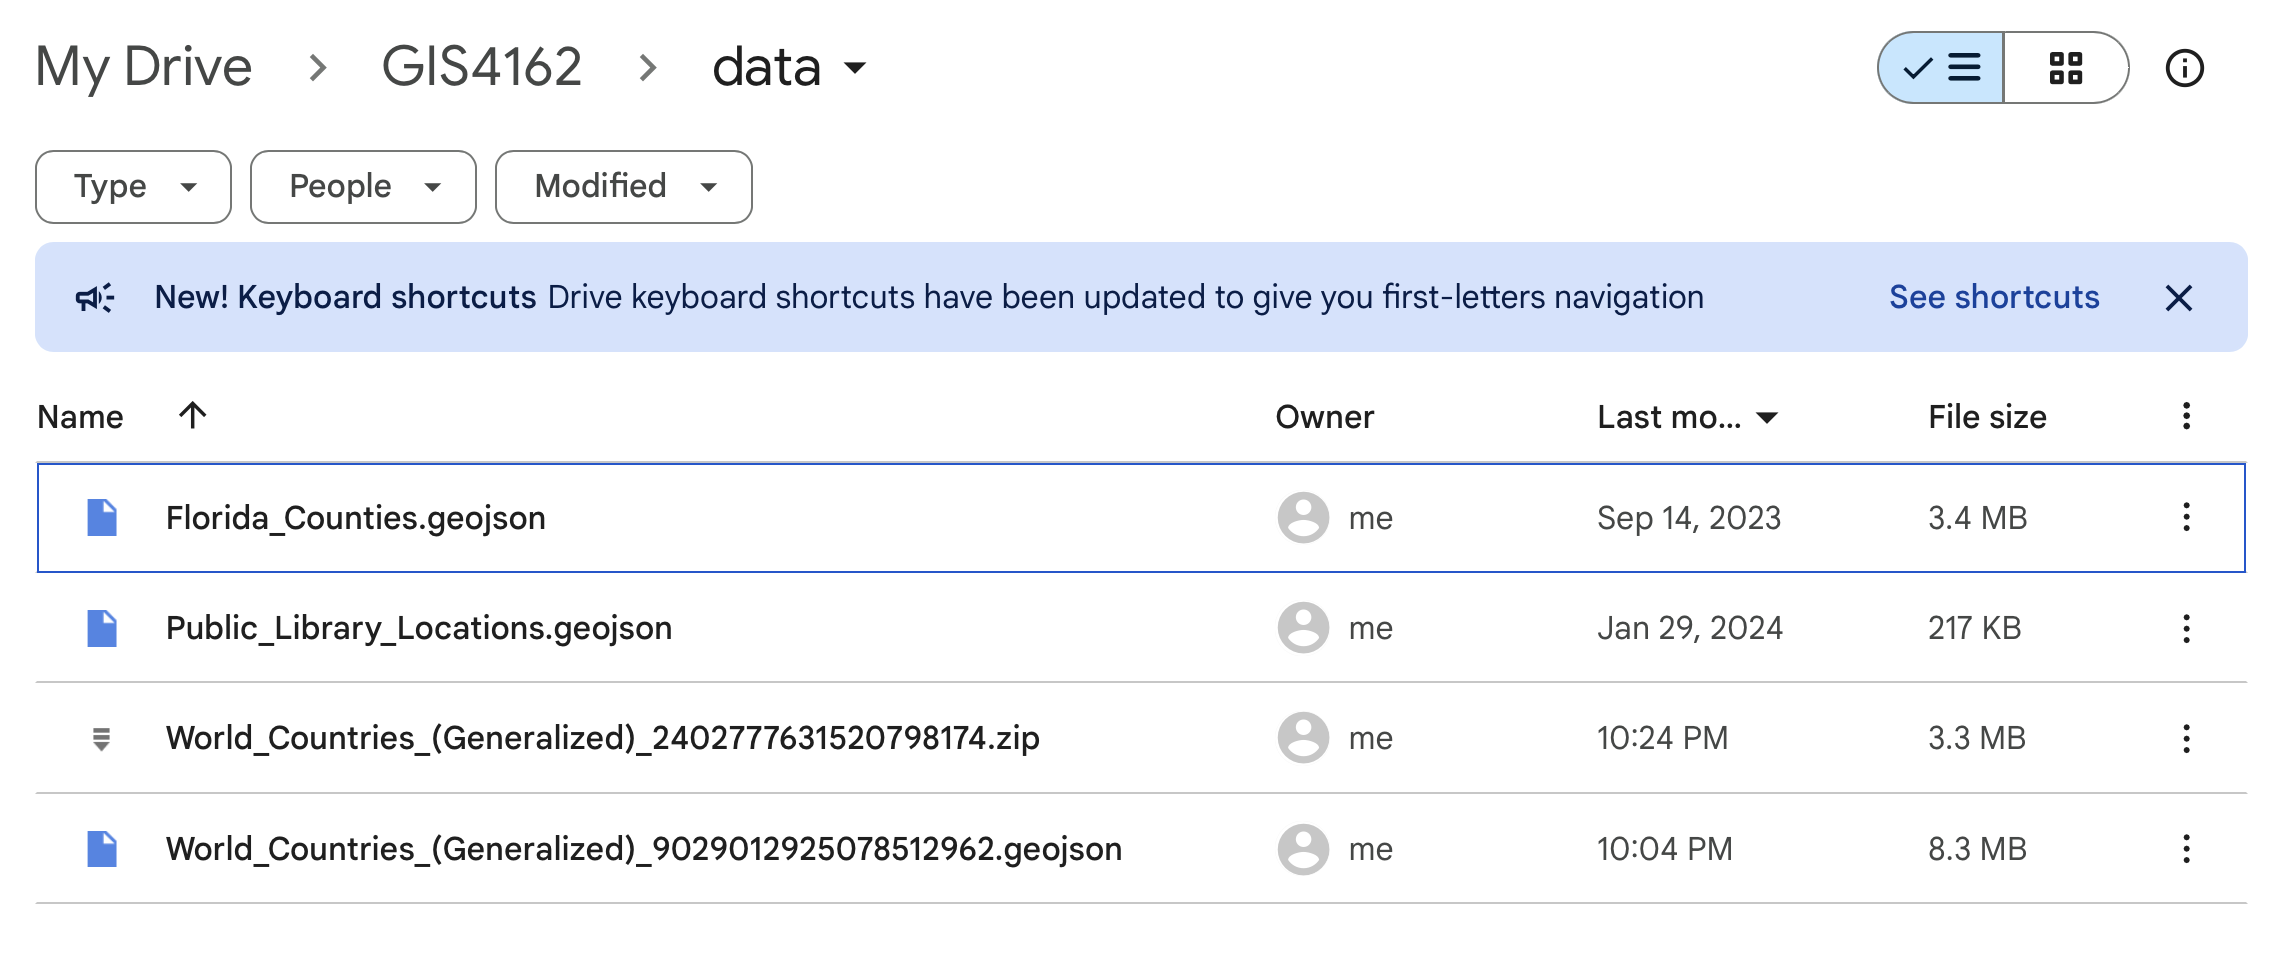

You may need to click the refresh button to refresh if you make any new changes.

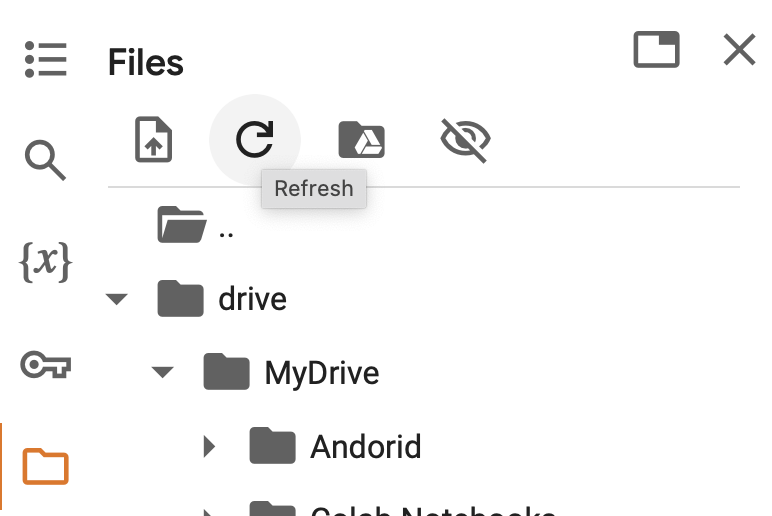

Copy the path and paste it to below and run the code.

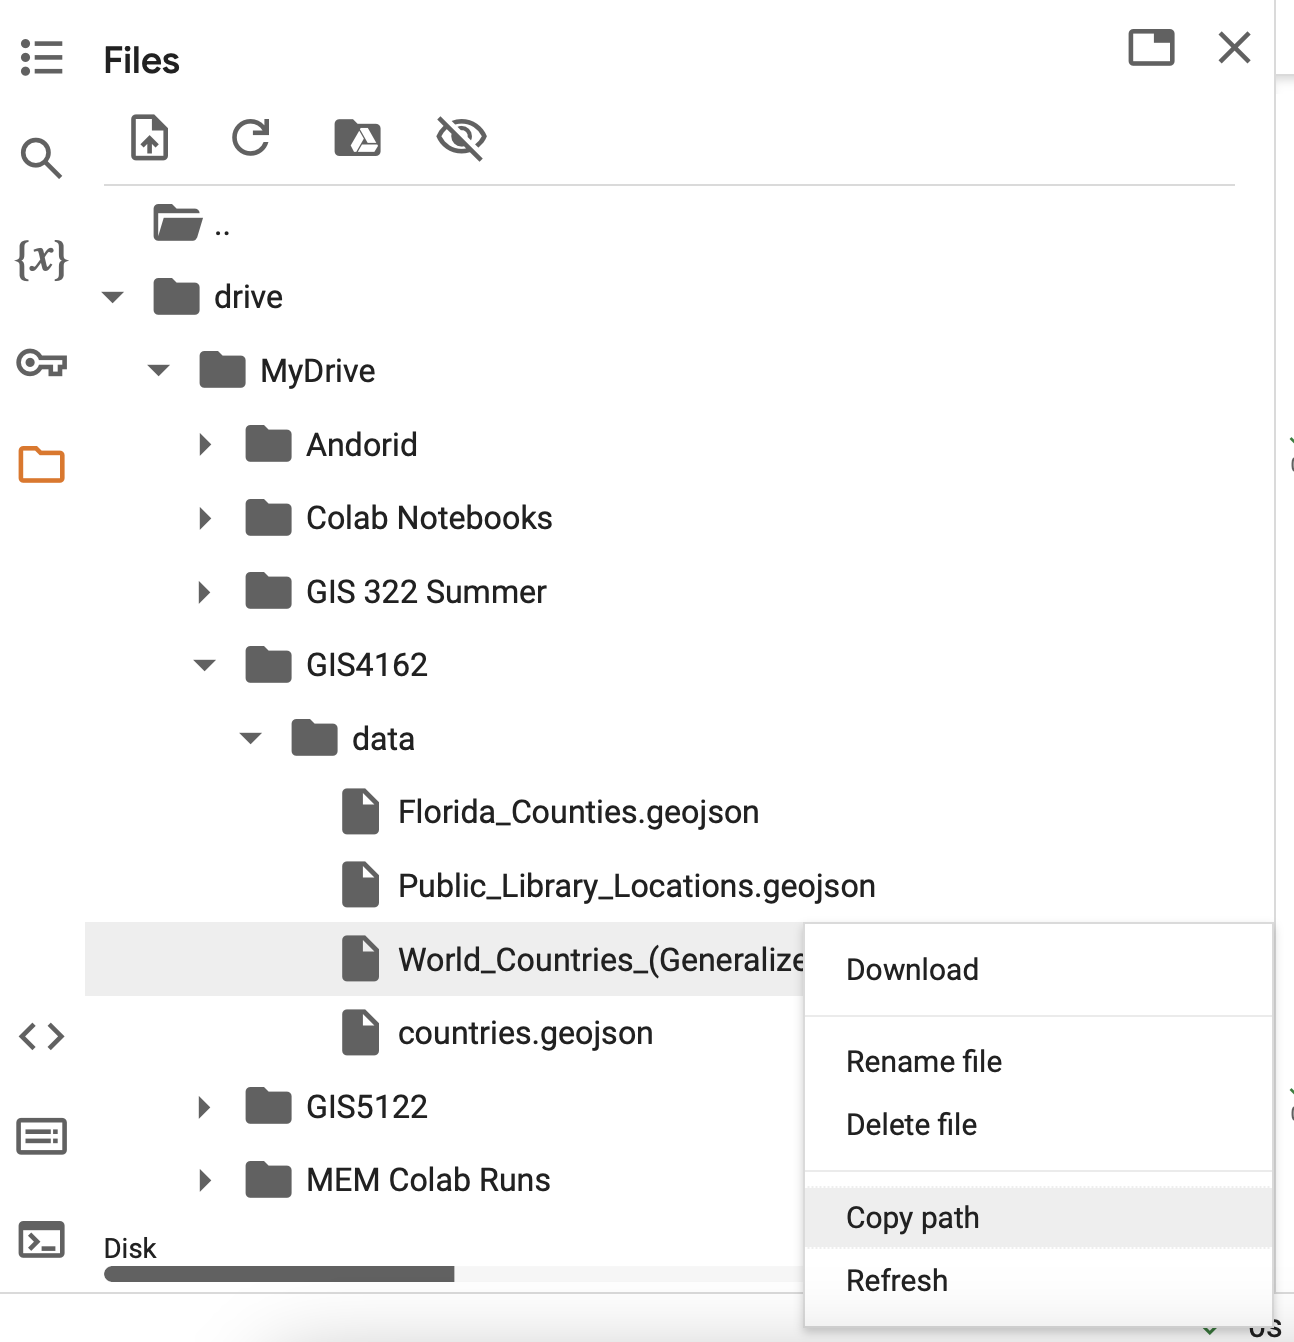

In [3]:
path1 = "/content/drive/MyDrive/GIS4162/data/World_Countries_(Generalized)_9029012925078512962.geojson"

path2 = "/content/drive/MyDrive/GIS4162/data/World_Countries_(Generalized)_2402777631520798174.zip"

#if using zipped shapefile, replace with path1 with path2
countries = geopandas.read_file(path1)

The above code will use `geopandas`'s `read_file()` function to read the data from the given path, and assign the data to a variable called `countries`. The variable name `countries` can be replaced with any other names.

To make a very simple map, call the `.plot()` function on your `countries`.

<Axes: >

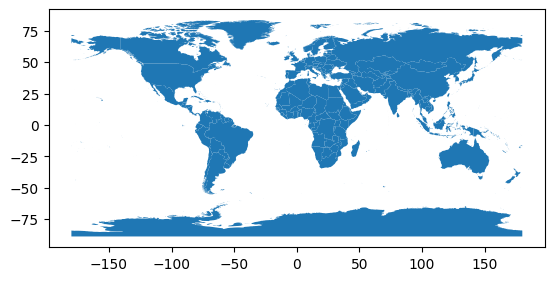

In [4]:
countries.plot()

Sometimes, you can read the data directly from a public URL when available. Here, I store the ocean data in the class github, so you don't need to do any downloading/uploading so to read the file in directly.

In [5]:
ocean_url = "https://raw.githubusercontent.com/Ziqi-Li/GEO4162C/spring-24/data/world_ocean.geojson"

ocean = geopandas.read_file(ocean_url)

<Axes: >

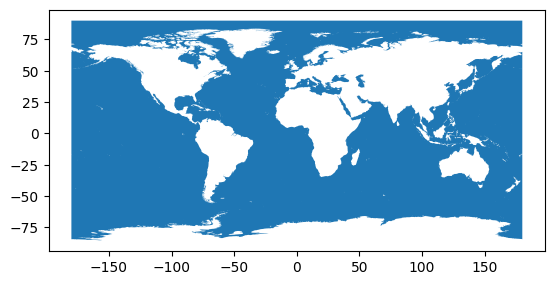

In [6]:
ocean.plot()

### Coordinate Reference System

Recap: the CRS defines how coordinates are matched to locations on the earth. If the data are obtained from official sources, data should have CRS information. To check, call the `.crs` property to see the crs information for each dataset.

In [7]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
ocean.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Luckily, both data has a CRS following WGS 84 datum and with EPSG code of 4326.

But if not, for any analysis, we need to transform them into the same `crs`, otherwise, they will not align.

You can use the `.to_crs()` function to transform into any other crs systems.

<Axes: >

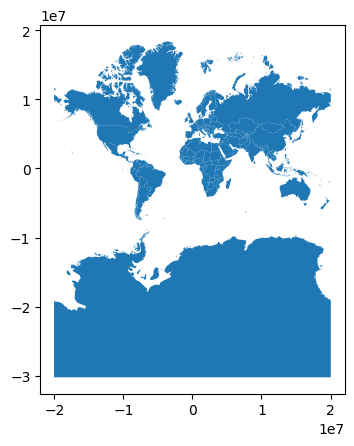

In [9]:
new_countries = countries.to_crs("EPSG:3857")
new_countries.plot()

You will notice the `new_countries` has a different shape than the previous map. This is because the crs is different.

In [10]:
new_countries.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Overlay two maps

When you have multiple maps, it is useful to overlay them together for visualization or anlaysis. To do that, we need to create an `axis` which we can call it `ax`. Then for the map that will be put on top, make `ax=ax` inside of the `.plot()` function like below

<Axes: >

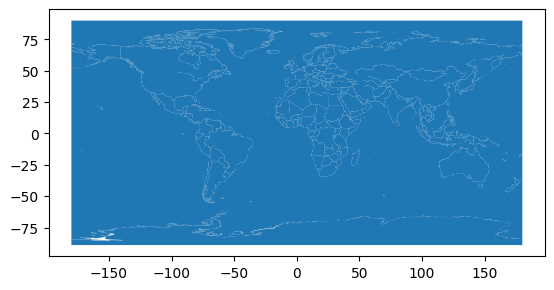

In [11]:
ax = ocean.plot()

countries.plot(ax=ax)

To change colors: you can specify the `color` parameter. Now land and ocean are more distinct.

<Axes: >

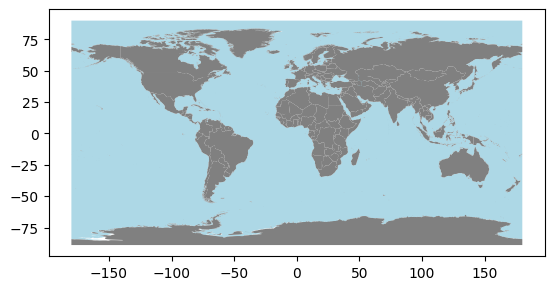

In [12]:
ax = ocean.plot(color='lightblue')

countries.plot(ax=ax, color='grey')

### Maps in other CRS.

Below, we transform the data into different CRS and to see their appearance.

### WGS 84, Geographic reference system

<Axes: >

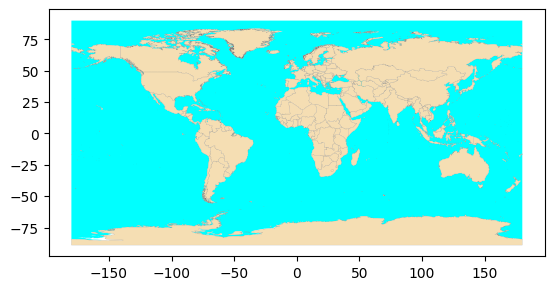

In [13]:
ax = ocean.plot(color='aqua')

countries.plot(ax=ax,color='wheat',linewidth=0.1, edgecolor='grey',)

### Robinson

<Axes: >

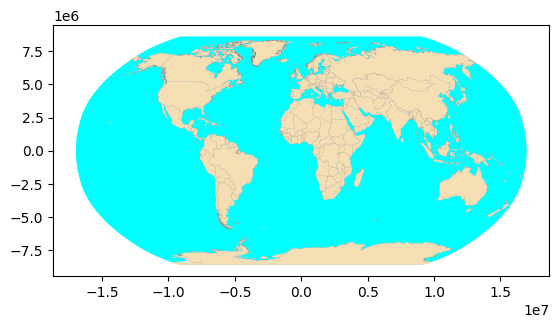

In [14]:
ax = ocean.to_crs("ESRI:53030").plot(color='aqua')

countries.to_crs("ESRI:53030").plot(ax=ax,color='wheat',linewidth=0.1, edgecolor='grey',)

### Goode

<Axes: >

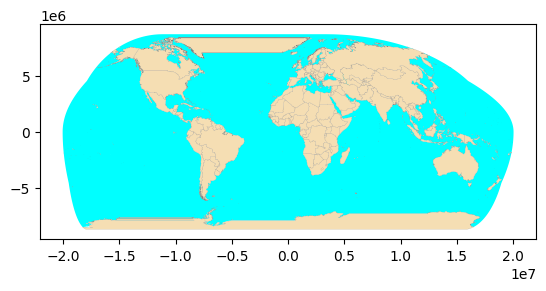

In [15]:
ax = ocean.to_crs("ESRI:54052").plot(color='aqua')

countries.to_crs("ESRI:54052").plot(ax=ax,color='wheat',linewidth=0.1, edgecolor='grey',)

### Bonne

<Axes: >

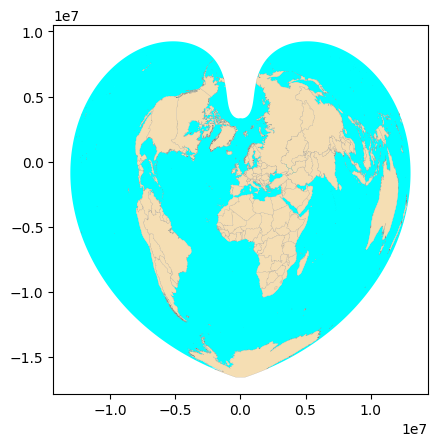

In [16]:
ax = ocean.to_crs("ESRI:53024").plot(color='aqua')

countries.to_crs("ESRI:53024").plot(ax=ax,color='wheat',linewidth=0.1, edgecolor='grey',)

### Azimuthal Equidistant North Pole

<Axes: >

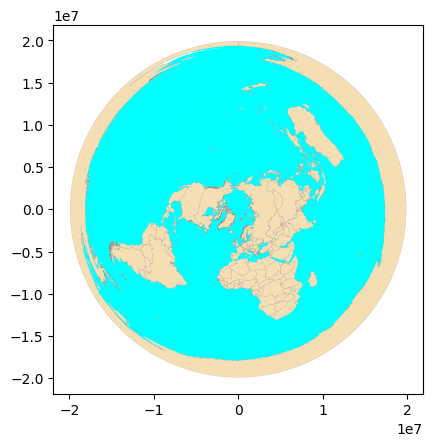

In [17]:
ax = ocean.to_crs("ESRI:102016").plot(color='aqua')

countries.to_crs("ESRI:102016").plot(ax=ax,color='wheat',linewidth=0.1, edgecolor='grey',)

For look up any crs, go to [https://epsg.io/](https://epsg.io/)